In [1]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import rc
import PIL
import seaborn as sns 
from wordcloud import WordCloud 
from konlpy.tag import Okt
import numpy as np
import locale
from collections import Counter
import re

In [2]:
from matplotlib import font_manager, rc
font_path = '/Users/youngjinseo/Library/Fonts/NanumGothicBold.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
import matplotlib.font_manager as fm 

sys_font = fm.findSystemFonts()
[f for f in sys_font if 'Nanum' in f ]

['/Users/youngjinseo/Library/Fonts/NanumGothicExtraBold.otf',
 '/Users/youngjinseo/Library/Fonts/NanumGothicBold.ttf',
 '/Users/youngjinseo/Library/Fonts/NanumGothic.ttf',
 '/Users/youngjinseo/Library/Fonts/NanumGothicLight.ttf',
 '/Users/youngjinseo/Library/Fonts/NanumGothicBold.otf',
 '/Users/youngjinseo/Library/Fonts/NanumGothicLight.otf',
 '/Users/youngjinseo/Library/Fonts/NanumGothicExtraBold.ttf',
 '/Users/youngjinseo/Library/Fonts/NanumGothic.otf']

In [4]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [5]:
purchase = pd.read_csv("fixed_purchase.csv")
purchase.head(4)

,Unnamed: 0,id,OrderId,PersonId,PurchaseDate,ItemDescription,SalesUnit,Price,ProductCode,MasterCategoryFullName,Agegroup,Gender,Retailer,Agedivide
0,1,2,e130983aa3cbb55798d5a410c675ea4d,a55a071126dd47d5414773bfc8a06c09,2021-02-11,대림 오양맛살270g,1,1480,8801088106118,가공식품-어육/연식품류-어육제품류-맛살,36,F,A,30~39
1,2,8,7b6aaa11bed7b6f8b2a0700f868666bc,168586e3815732f18f68ddef204819c7,2021-01-01,풀무원 김치뚝배기 우동 (2인),1,6180,8801114147252,가공식품-즉석/편의식품-즉석/조리식품-즉석면류,36,M,B,30~39
2,3,9,4dc7b48d46aa7bce5531515ec4658524,a55a071126dd47d5414773bfc8a06c09,2021-02-11,CJ백설소갈비양념500g,1,2580,8801007176352,가공식품-조미료-드레싱/소스-소스,36,F,A,30~39
3,4,11,cdf39184d39c29bd08f33cd3df2356af,a55a071126dd47d5414773bfc8a06c09,2021-02-11,샘표맛간장조림볶음용,2,8880,8801005104067,가공식품-조미료-장류-간장,36,F,A,30~39


In [6]:
purchase['PurchaseDate'] = pd.to_datetime(purchase['PurchaseDate'])
purchase['Year'] = purchase['PurchaseDate'].dt.year
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118809 entries, 0 to 118808
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Unnamed: 0              118809 non-null  int64         
 1   id                      118809 non-null  int64         
 2   OrderId                 118809 non-null  object        
 3   PersonId                118809 non-null  object        
 4   PurchaseDate            118809 non-null  datetime64[ns]
 5   ItemDescription         118809 non-null  object        
 6   SalesUnit               118809 non-null  int64         
 7   Price                   118809 non-null  int64         
 8   ProductCode             118809 non-null  int64         
 9   MasterCategoryFullName  118809 non-null  object        
 10  Agegroup                118809 non-null  int64         
 11  Gender                  118809 non-null  object        
 12  Retailer                118809

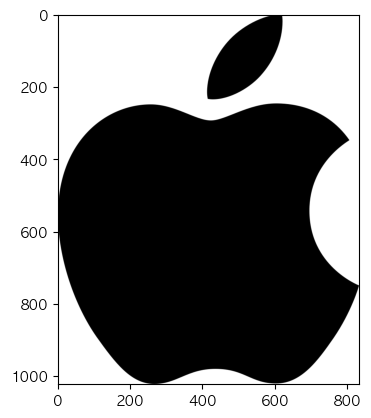

In [7]:
icon1 = PIL.Image.open('apple.png')
plt.imshow(icon1)

In [8]:
img = PIL.Image.new('RGB', icon1.size,(255,255,255))
img.paste(icon1,icon1)
img = np.array(img)

img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [14]:
def remove_special_characters(text):
    return re.sub(r'[^ ㄱ-ㅣ가-힣]+', ' ', text)

In [19]:
data21=purchase[purchase['Year'] == 2021]
data22=purchase[purchase['Year'] == 2022]
data23=purchase[purchase['Year'] == 2023] 

# 상품구매2021

In [24]:
text1 = ' '.join(data21['MasterCategoryFullName'])  
text1 = remove_special_characters(text1)  
okt = Okt()
nouns1 = okt.nouns(text1)
word_counts1 = Counter(nouns1)

In [25]:
font_path = "/Users/youngjinseo/Library/Fonts/NanumGothic.ttf"
wordcloud1 = WordCloud(width=800, height=400, background_color='white', 
                      font_path = font_path, mask = img).generate_from_frequencies(word_counts1)

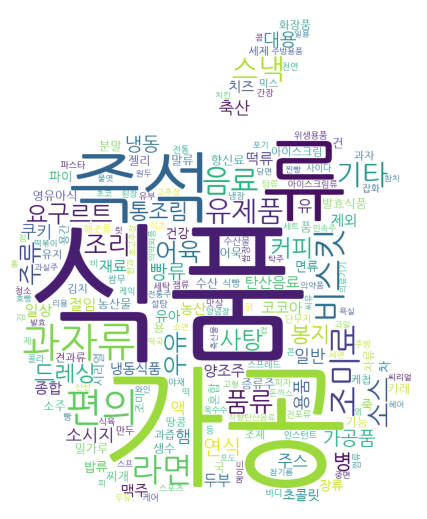

In [26]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud1)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [41]:
df1 = pd.DataFrame.from_dict(word_counts1, orient = 'index').reset_index()
df1 = df1.rename(columns = {'index':'words', 0: 'count'})

df1_result = df1.sort_values(by = 'count',axis = 0,ascending = False)
df1_result[:10]

,words,count
1,식품,87206
0,가공,65598
9,류,24494
6,즉석,17911
37,과자류,13825
7,편의,12934
52,비스킷,9302
10,조미료,9039
54,라면,8696
59,음료,7341


# 상품구매2022

In [27]:
text2 = ' '.join(data22['MasterCategoryFullName'])  
text2 = remove_special_characters(text2)  
okt = Okt()
nouns2 = okt.nouns(text2)
word_counts2 = Counter(nouns2)

In [28]:
font_path = "/Users/youngjinseo/Library/Fonts/NanumGothic.ttf"
wordcloud2 = WordCloud(width=800, height=400, background_color='white', 
                      font_path = font_path, mask = img).generate_from_frequencies(word_counts2)

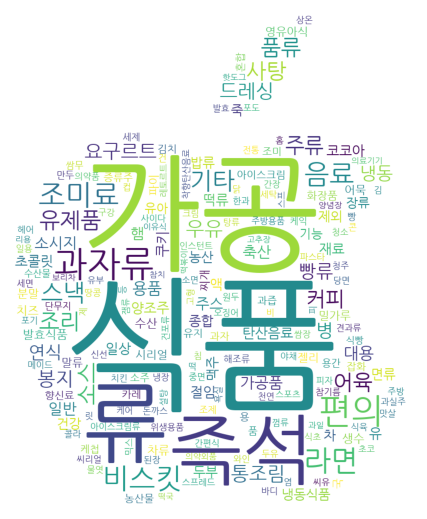

In [30]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [40]:
df2 = pd.DataFrame.from_dict(word_counts2, orient = 'index').reset_index()
df2 = df2.rename(columns = {'index':'words', 0: 'count'})

df2_result = df2.sort_values(by = 'count',axis = 0,ascending = False)
df2_result[:10]

,words,count
1,식품,56609
0,가공,42208
11,류,16392
25,즉석,12114
31,과자류,8988
26,편의,8424
27,라면,5863
57,조미료,5681
34,비스킷,5525
42,음료,4983


# 상품구매2023

In [31]:
text3 = ' '.join(data23['MasterCategoryFullName'])  
text3 = remove_special_characters(text3)  
okt = Okt()
nouns3 = okt.nouns(text3)
word_counts3 = Counter(nouns3)

In [32]:
font_path = "/Users/youngjinseo/Library/Fonts/NanumGothic.ttf"
wordcloud3 = WordCloud(width=800, height=400, background_color='white', 
                      font_path = font_path, mask = img).generate_from_frequencies(word_counts3)

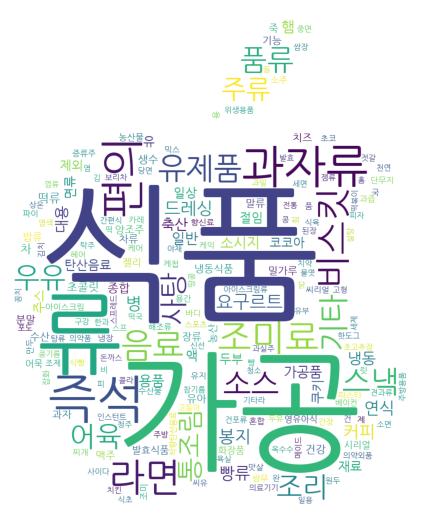

In [33]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud3)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [39]:
df3 = pd.DataFrame.from_dict(word_counts3, orient = 'index').reset_index()
df3 = df3.rename(columns = {'index':'words', 0: 'count'})

df3_result = df3.sort_values(by = 'count',axis = 0,ascending = False)
df3_result[:10]

,words,count
1,식품,18377
0,가공,13657
4,류,5219
14,즉석,3831
2,과자류,2949
15,편의,2730
69,라면,2072
20,조미료,1790
18,비스킷,1784
53,음료,1549


# Retail

In [42]:
purchase.head(5)

,Unnamed: 0,id,OrderId,PersonId,PurchaseDate,ItemDescription,SalesUnit,Price,ProductCode,MasterCategoryFullName,Agegroup,Gender,Retailer,Agedivide,Year
0,1,2,e130983aa3cbb55798d5a410c675ea4d,a55a071126dd47d5414773bfc8a06c09,2021-02-11,대림 오양맛살270g,1,1480,8801088106118,가공식품-어육/연식품류-어육제품류-맛살,36,F,A,30~39,2021
1,2,8,7b6aaa11bed7b6f8b2a0700f868666bc,168586e3815732f18f68ddef204819c7,2021-01-01,풀무원 김치뚝배기 우동 (2인),1,6180,8801114147252,가공식품-즉석/편의식품-즉석/조리식품-즉석면류,36,M,B,30~39,2021
2,3,9,4dc7b48d46aa7bce5531515ec4658524,a55a071126dd47d5414773bfc8a06c09,2021-02-11,CJ백설소갈비양념500g,1,2580,8801007176352,가공식품-조미료-드레싱/소스-소스,36,F,A,30~39,2021
3,4,11,cdf39184d39c29bd08f33cd3df2356af,a55a071126dd47d5414773bfc8a06c09,2021-02-11,샘표맛간장조림볶음용,2,8880,8801005104067,가공식품-조미료-장류-간장,36,F,A,30~39,2021
4,5,13,e9cc3608b87a750d9d690378a314bc0a,a55a071126dd47d5414773bfc8a06c09,2021-02-11,샘표맛간장국찌개1.8L,1,8900,8801005110228,가공식품-조미료-장류-간장,36,F,A,30~39,2021


In [43]:
retaila=purchase[purchase['Retailer'] == 'A']
retailb=purchase[purchase['Retailer'] == 'B']

# Retail A

In [44]:
texta = ' '.join(retaila['ItemDescription'])  
texta = remove_special_characters(texta)  
okt = Okt()
nounsa = okt.nouns(texta)
word_countsa = Counter(nounsa)

In [45]:
font_path = "/Users/youngjinseo/Library/Fonts/NanumGothic.ttf"
wordclouda = WordCloud(width=800, height=400, background_color='white', 
                      font_path = font_path, mask = img).generate_from_frequencies(word_countsa)

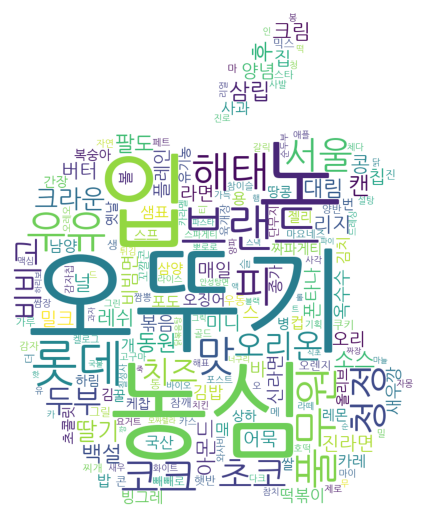

In [46]:
plt.figure(figsize=(10, 5))
plt.imshow(wordclouda)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# RetailB

In [47]:
textb = ' '.join(retailb['ItemDescription'])  
textb = remove_special_characters(textb)  
okt = Okt()
nounsb = okt.nouns(textb)
word_countsb = Counter(nounsb)

In [48]:
font_path = "/Users/youngjinseo/Library/Fonts/NanumGothic.ttf"
wordcloudb = WordCloud(width=800, height=400, background_color='white', 
                      font_path = font_path, mask = img).generate_from_frequencies(word_countsb)

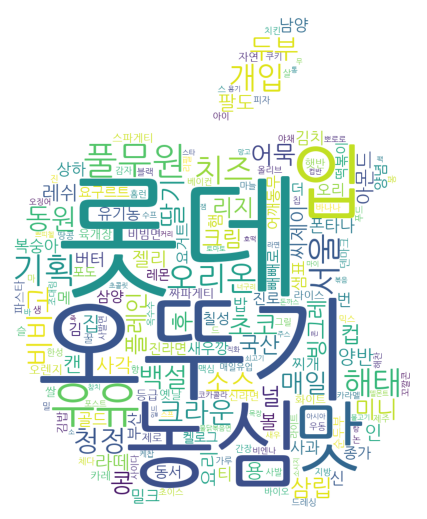

In [49]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudb)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()